In [1]:
import pandas as pd

In [2]:
m12 = pd.read_csv('evasão_12.csv')
m13 = pd.read_csv('evasão_13.csv')
m14 = pd.read_csv('evasão_14.csv')
m15 = pd.read_csv('evasão_15.csv')
m16 = pd.read_csv('evasão_16.csv')

In [4]:
m12.drop(columns=['Unnamed: 0'], inplace=True)
m13.drop(columns=['Unnamed: 0'], inplace=True)
m14.drop(columns=['Unnamed: 0'], inplace=True)
m15.drop(columns=['Unnamed: 0'], inplace=True)
m16.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
m12['Ano']=2012
m13['Ano']=2013
m14['Ano']=2014
m15['Ano']=2015
m16['Ano']=2016

In [35]:
evasao = pd.concat([m12, m13, m14, m15, m16])

In [36]:
evasao.columns.tolist()

['ID',
 'Idade',
 'Necessidade_especial',
 'Cegueira',
 'Baixa_visao',
 'Surdez',
 'Def_auditiva',
 'Surdocegueira',
 'Def_fisica',
 'Def_intelectual',
 'Def_multipla',
 'Autismo',
 'Asperger',
 'Rett',
 'Transtorno_DI',
 'Superdotacao',
 'Etapa_ensino',
 'ID_escola',
 'Status',
 'Etnia_Branca',
 'Etnia_Indígena',
 'Etnia_Não Declarada',
 'Etnia_Parda',
 'Etnia_Preta',
 'Nacionalidade_Brasileiro',
 'Nacionalidade_Extrangeiro',
 'Nacionalidade_Naturalizado',
 'Zona_res_Urbana',
 'Outro_local_aula_Hospital',
 'Outro_local_aula_Não recebe',
 'Unificada_Multi',
 'Unificada_Não',
 'Tipo_turma_Classe Hospitalar',
 'Tipo_turma_Não se aplica',
 'Tipo_turma_Unidade prisional',
 'Localizacao_Rural',
 'Localizacao_Urbana',
 'Administracao_Federal',
 'Administracao_Municipal',
 'Administracao_Privada',
 'Ano',
 'Sexo_M',
 'Unificada_Multietapa']

In [37]:
evasao = pd.get_dummies(evasao, columns=['Status'])

In [38]:
evasao.drop(columns=['Status_aprovado', 'Status_repetente', 'ID', 'Ano', 'ID_escola'], inplace=True)

In [39]:
evasao.to_csv('evasao2.csv')

In [40]:
evasao = evasao.fillna(0)
evasao_features = evasao.drop(columns=['Status_evadido']).values
evasao_target = evasao['Status_evadido'].values

In [41]:
evasao['Status_evadido'].value_counts()/len(evasao)

0    0.918226
1    0.081774
Name: Status_evadido, dtype: float64

In [42]:
#Undersampling
y1 = evasao[evasao['Status_evadido']==1]
y0 = evasao[evasao['Status_evadido']==0]

In [43]:
y0_novo = y0.sample(n=len(y1))

In [44]:
y_novo = pd.concat([y1, y0_novo])
y_novo['Status_evadido'].unique()

array([1, 0], dtype=uint8)

In [45]:
x_novo = y_novo.drop(columns=['Status_evadido']).values
y_novo = y_novo['Status_evadido'].values
print(x_novo.shape, y_novo.shape)


(135698, 39) (135698,)


In [46]:
from sklearn.model_selection import train_test_split
evasao_train, evasao_test, status_evadido_train, status_evadido_test = train_test_split(x_novo, y_novo, test_size = 0.2, random_state = 0)

In [20]:
#Buscando melhores parâmetros- Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
min_samples = [2, 10, 50, 200, 1000]
n_est = [10, 20, 50, 100]
crit = ['entropy', 'gini']
for s in range(len(min_samples)):
  for n in range(len(n_est)):
    for c in range(len(crit)):
      print(s, n, c)
      print("n_estimators = ",  n_est[n], ", criterion = ", crit[c], ", min_samples_split = ", min_samples[s])
      classifier_RF = RandomForestClassifier(n_estimators = n_est[n], criterion = crit[c], min_samples_split = min_samples[s], random_state = 0)
      classifier_RF.fit(evasao_train, status_evadido_train)
      status_evadido_pred_RF = classifier_RF.predict(evasao_test)
      acuracia_RF = accuracy_score(status_evadido_test, status_evadido_pred_RF)
      print("Acuracia: ", acuracia_RF)
      cm_RF = confusion_matrix(status_evadido_test, status_evadido_pred_RF)
      print("Confusion Matrix: ")
      print(cm_RF)
      print()

0 0 0
n_estimators =  10 , criterion =  entropy , min_samples_split =  2
Acuracia:  0.7173544583640383
Confusion Matrix: 
[[10325  3190]
 [ 4481  9144]]

0 0 1
n_estimators =  10 , criterion =  gini , min_samples_split =  2
Acuracia:  0.7150700073691968
Confusion Matrix: 
[[10254  3261]
 [ 4472  9153]]

0 1 0
n_estimators =  20 , criterion =  entropy , min_samples_split =  2
Acuracia:  0.7225865880619012
Confusion Matrix: 
[[10217  3298]
 [ 4231  9394]]

0 1 1
n_estimators =  20 , criterion =  gini , min_samples_split =  2
Acuracia:  0.7192704495210022
Confusion Matrix: 
[[10149  3366]
 [ 4253  9372]]

0 2 0
n_estimators =  50 , criterion =  entropy , min_samples_split =  2
Acuracia:  0.7245762711864406
Confusion Matrix: 
[[10131  3384]
 [ 4091  9534]]

0 2 1
n_estimators =  50 , criterion =  gini , min_samples_split =  2
Acuracia:  0.7227708179808401
Confusion Matrix: 
[[10090  3425]
 [ 4099  9526]]

0 3 0
n_estimators =  100 , criterion =  entropy , min_samples_split =  2
Acuracia:  

KeyboardInterrupt: 

In [47]:
#melhores parâmetros- Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
classifier_RF = RandomForestClassifier(n_estimators =  100 , criterion =  "entropy" , min_samples_split =  50, random_state = 0)
classifier_RF.fit(evasao_train, status_evadido_train)
status_evadido_pred_RF = classifier_RF.predict(evasao_test)
acuracia_RF = accuracy_score(status_evadido_test, status_evadido_pred_RF)
print("Acuracia: ", acuracia_RF)
cm_RF = confusion_matrix(status_evadido_test, status_evadido_pred_RF)
print("Confusion Matrix: ")
print(cm_RF)
print()

Acuracia:  0.6487103905674282
Confusion Matrix: 
[[9118 4397]
 [5137 8488]]



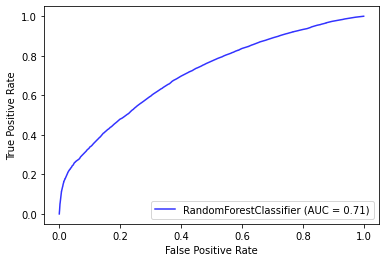

In [48]:
#ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
ax = plt.gca()
rfc_disp = plot_roc_curve(classifier_RF, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'blue')
#svc_disp = plot_roc_curve(classifier_SVM, evasao_test, status_evadido_test, ax=ax, alpha=0.8, color = 'green')
plt.show()

In [49]:
#Predict_proba
from pandas import DataFrame
from IPython.display import HTML
from random import sample
sample_evasao_test = sample(list(evasao_test),20)
pred_prob_RF = classifier_RF.predict_proba(sample_evasao_test)
HTML('<h1>Random Forest predict_proba</h1>'+DataFrame(pred_prob_RF).to_html())

,0,1
0,0.414348,0.585652
1,0.532135,0.467865
2,0.506571,0.493429
3,0.229502,0.770498
4,0.331459,0.668541
5,0.397548,0.602452
6,0.425563,0.574437
7,0.811678,0.188322
8,0.315536,0.684464
9,0.632836,0.367164


Status_evadido
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: predict_proba_RF, dtype: object

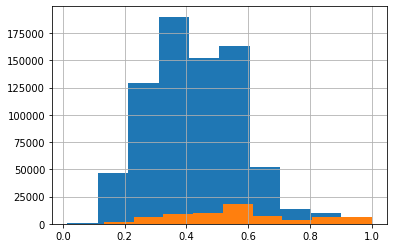

In [50]:
y_predict = classifier_RF.predict(evasao_features)
evasao['y_pred'] = y_predict
evasao['predict_proba_RF'] = classifier_RF.predict_proba(evasao_features)[:,1]
evasao.groupby('Status_evadido')['predict_proba_RF'].hist()

In [51]:
q = evasao['predict_proba_RF'].quantile([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
q

0.0    0.014335
0.1    0.247998
0.2    0.301374
0.3    0.325277
0.4    0.367358
0.5    0.420191
0.6    0.482645
0.7    0.534739
0.8    0.573499
0.9    0.629221
1.0    1.000000
Name: predict_proba_RF, dtype: float64

In [52]:
evasao['Status_evadido'].value_counts()/len(evasao)

0    0.918226
1    0.081774
Name: Status_evadido, dtype: float64

In [53]:
q = evasao['predict_proba_RF'].quantile([0.30, 0.60, 0.859, 1.00])
q = pd.DataFrame(q)
q.columns = ['prob']
q

,prob
0.300,0.325277
0.600,0.482645
0.859,0.598534
1.000,1.000000


In [54]:
analise_RF = {'Risco de Evasao':["Baixo", "Médio-baixo", "Médio-alto", "Alto"], 'Probab. de Evasão': ["Até 11%", "entre 11% e 24,5%", "entre 24,5% e 80%", "entre 80% e 100%"], '% da população': ["30%", "30%", "25,6%", "14,4%"]}
analise_RF = pd.DataFrame.from_dict(analise_RF, orient='columns')
analise_RF

,Risco de Evasao,Probab. de Evasão,% da população
0,Baixo,Até 11%,30%
1,Médio-baixo,"entre 11% e 24,5%",30%
2,Médio-alto,"entre 24,5% e 80%","25,6%"
3,Alto,entre 80% e 100%,"14,4%"


Feature: 0, Score: 0.54319
Feature: 1, Score: 0.01396
Feature: 2, Score: 0.00041
Feature: 3, Score: 0.00138
Feature: 4, Score: 0.00140
Feature: 5, Score: 0.00101
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00217
Feature: 8, Score: 0.01250
Feature: 9, Score: 0.00131
Feature: 10, Score: 0.00133
Feature: 11, Score: 0.00066
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.00226
Feature: 14, Score: 0.00089
Feature: 15, Score: 0.13483
Feature: 16, Score: 0.01139
Feature: 17, Score: 0.00160
Feature: 18, Score: 0.00987
Feature: 19, Score: 0.00668
Feature: 20, Score: 0.00321
Feature: 21, Score: 0.02667
Feature: 22, Score: 0.01532
Feature: 23, Score: 0.00621
Feature: 24, Score: 0.00645
Feature: 25, Score: 0.00032
Feature: 26, Score: 0.00171
Feature: 27, Score: 0.00027
Feature: 28, Score: 0.00330
Feature: 29, Score: 0.00009
Feature: 30, Score: 0.07425
Feature: 31, Score: 0.00007
Feature: 32, Score: 0.00016
Feature: 33, Score: 0.00283
Feature: 34, Score: 0.00430
Feature: 35, Score: 0.06275
Fe

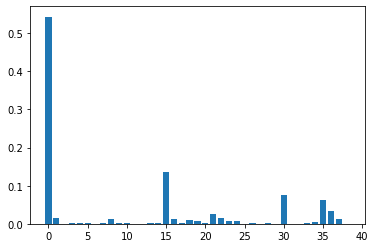

In [55]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# get importance
importance = classifier_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [56]:
import numpy as np

importances = classifier_RF.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in classifier_RF.estimators_], axis=0)

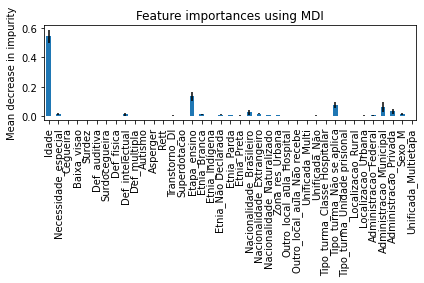

In [57]:
forest_importances = pd.Series(importances, index=evasao.drop(columns=['Status_evadido', 'y_pred', 'predict_proba_RF',
                                                                       ]).columns.tolist())

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
#curva roc, score probabilidade para todo o dataset classe.predict_proba, estudo de KomogorovSmirnoff (distâncias das classes negativas vs. classes positivas)
#histogram das distribuições de cada classe/decis e criar uma label por decis, feature importance, otimizar modelo grid search
#MLOPS - ML Operations (operacionalizar o modelo provido pelo cientista de dados)
#DataOps - Entrega em estruturas